In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.MM_estimation import estimate_w_factor_loading
from src.ML_estimation import mle_trapz_g_and_w

# Data

In [2]:
# Load the data
grades_data = pd.read_csv('data/grades_hist_pd.csv', sep=';', index_col=0)

for col_name in grades_data.columns:
    grades_data[col_name] = grades_data[col_name] / 100
    
grades_cols = grades_data.columns

In [3]:
grades_data.head()

,AAA,AA,A,BBB,BB,B,CCC/C
Year,,,,,,,
1981,0.0,0.0,0.0000,0.0000,0.0000,0.0233,0.0000
1982,0.0,0.0,0.0021,0.0035,0.0424,0.0318,0.2143
1983,0.0,0.0,0.0000,0.0034,0.0116,0.0470,0.0667
1984,0.0,0.0,0.0000,0.0068,0.0114,0.0349,0.2500
1985,0.0,0.0,0.0000,0.0000,0.0150,0.0653,0.1538


In [4]:
grades_data.mean()

AAA      0.000000
AA       0.000137
A        0.000530
BBB      0.001948
BB       0.008557
B        0.041913
CCC/C    0.249193
dtype: float64

In [5]:
num_of_obligors_data = {
    "AAA": 8,
    "AA": 322,
    "A": 1432,
    "BBB": 1855,
    "BB": 1289,
    "B": 2078,
    "CCC/C": 238
}

In [6]:
num_of_obligors_data

{'AAA': 8,
 'AA': 322,
 'A': 1432,
 'BBB': 1855,
 'BB': 1289,
 'B': 2078,
 'CCC/C': 238}

In [7]:
grades_cols

Index(['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C'], dtype='object')

In [8]:
for col_name in grades_cols:
    print(num_of_obligors_data[col_name])

8
322
1432
1855
1289
2078
238


In [5]:
# Assumption every grade has 10000 obligors
#n_g_assumption = 3000

In [9]:
for col_name in grades_cols:
    grades_data[str(col_name) + " defaults"] = round(num_of_obligors_data[col_name] * grades_data[col_name])

In [10]:
grades_data

,AAA,AA,A,BBB,BB,B,CCC/C,AAA defaults,AA defaults,A defaults,BBB defaults,BB defaults,B defaults,CCC/C defaults
Year,,,,,,,,,,,,,,
1981,0.0,0.0000,0.0000,0.0000,0.0000,0.0233,0.0000,0.0,0.0,0.0,0.0,0.0,48.0,0.0
1982,0.0,0.0000,0.0021,0.0035,0.0424,0.0318,0.2143,0.0,0.0,3.0,6.0,55.0,66.0,51.0
1983,0.0,0.0000,0.0000,0.0034,0.0116,0.0470,0.0667,0.0,0.0,0.0,6.0,15.0,98.0,16.0
1984,0.0,0.0000,0.0000,0.0068,0.0114,0.0349,0.2500,0.0,0.0,0.0,13.0,15.0,73.0,60.0
1985,0.0,0.0000,0.0000,0.0000,0.0150,0.0653,0.1538,0.0,0.0,0.0,0.0,19.0,136.0,37.0
1986,0.0,0.0000,0.0018,0.0034,0.0133,0.0845,0.2308,0.0,0.0,3.0,6.0,17.0,176.0,55.0
1987,0.0,0.0000,0.0000,0.0000,0.0038,0.0313,0.1228,0.0,0.0,0.0,0.0,5.0,65.0,29.0
1988,0.0,0.0000,0.0000,0.0000,0.0105,0.0368,0.2037,0.0,0.0,0.0,0.0,14.0,76.0,48.0
1989,0.0,0.0000,0.0018,0.0061,0.0073,0.0340,0.3333,0.0,0.0,3.0,11.0,9.0,71.0,79.0


In [11]:
grades_data.iloc[:, -5:].sum(axis=0)

A defaults          32.0
BBB defaults       143.0
BB defaults        442.0
B defaults        3481.0
CCC/C defaults    2374.0
dtype: float64

# Method of moments estimation

In [12]:
# MM for A, BBB, BB, B, CCC/C
grades_list = ["A", "BBB", "BB", "B", "CCC/C"]
# Call estimate_w_factor_loading function for each grade
num_of_rows = grades_data.shape[0]

MM_params = {}
for grade in grades_list:
    n_g_over_time = np.array([num_of_obligors_data[grade]] * num_of_rows)
    MM_params[grade] = estimate_w_factor_loading(grades_data[grade], n_g_over_time, initial_guess=0.45, tolerance=1e-20)
    print(f"Estimated parameters with method of moments for grade {grade}:", MM_params[grade][0], norm.ppf(MM_params[grade][1]))

Estimated parameters with method of moments for grade A: 0.32079619715323154 -3.274097580352716
Estimated parameters with method of moments for grade BBB: 0.3052910734050114 -2.8865426119490847
Estimated parameters with method of moments for grade BB: 0.34425506169993114 -2.3842278912651227
Estimated parameters with method of moments for grade B: 0.32802652316160996 -1.728911139866942
Estimated parameters with method of moments for grade CCC/C: 0.35192348999999484 -0.6770330266259245


In [13]:
MM_params

{'A': (0.32079619715323154, 0.0005299999999999999),
 'BBB': (0.3052910734050114, 0.0019475),
 'BB': (0.34425506169993114, 0.0085575),
 'B': (0.32802652316160996, 0.041912500000000005),
 'CCC/C': (0.35192348999999484, 0.2491925)}

# Maximum likelihood estimation

In [14]:
default_table = grades_data[[grade + " defaults" for grade in grades_list]]
# num_of_obligors_table all columns are constant and equal to num_of_obligors_data[grade]
np.array([list(num_of_obligors_data.values())[2:]] * default_table.shape[0])

array([[1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289, 2078,  238],
       [1432, 1855, 1289,

In [15]:
# Choose defaults cols from grades_data which is in grades_list
default_table = grades_data[[grade + " defaults" for grade in grades_list]]
num_of_obligors_table = np.array([list(num_of_obligors_data.values())[2:]] * default_table.shape[0])

gamma_init = [norm.ppf(MM_params[grade][1]) for grade in grades_list]
w_init = [MM_params[grade][0] for grade in grades_list]

ml_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_init, gamma_init)

In [16]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.25796213 0.30810677 0.28655603 0.3295988  0.23400287]
Estimated gamma parameters with maximum likelihood method: [-3.25732581 -2.88735103 -2.38341288 -1.73028909 -0.67635586]


# MLE1 estimation

In [20]:
MLE1_w = []
MLE1_gamma = []

for col in range(default_table.shape[1]):
    defaults_col = default_table.iloc[:, col]
    num_of_obligors_col = np.array([list(num_of_obligors_data.values())[2:][col]] * len(defaults_col))
    w_param, pd_param, _ = mle_trapz_g_and_w(defaults_col.values,
                                             num_of_obligors_col,
                                             [w_init[col]],
                                             [gamma_init[col]])
    print(f"Estimated w parameter for grade {grades_list[col]}:", w_param[0])
    print(f"Estimated gamma parameter for grade {grades_list[col]}:", pd_param[0])
    # Save the results
    MLE1_w.append(w_param[0])
    MLE1_gamma.append(pd_param[0])

Estimated w parameter for grade A: 0.5378761710456441
Estimated gamma parameter for grade A: -3.169554212177444
Estimated w parameter for grade BBB: 0.5071745696131205
Estimated gamma parameter for grade BBB: -2.8030945529131905
Estimated w parameter for grade BB: 0.40227045602361006
Estimated gamma parameter for grade BB: -2.365630785040319
Estimated w parameter for grade B: 0.3454046740691857
Estimated gamma parameter for grade B: -1.7280865455767747
Estimated w parameter for grade CCC/C: 0.33326611236130066
Estimated gamma parameter for grade CCC/C: -0.6574256413452311


## 1 w case

In [18]:
w_1 = [0.3]
ml_1w_results = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_1, gamma_init)

In [19]:
print("Estimated factor loading parameters with maximum likelihood method:", ml_1w_results[0])
print("Estimated gamma parameters with maximum likelihood method:", ml_1w_results[1])

Estimated factor loading parameters with maximum likelihood method: [0.30037574]
Estimated gamma parameters with maximum likelihood method: [-3.25489768 -2.89015766 -2.3832857  -1.7328108  -0.67376171]


In [22]:
# Save the results to dataframe
# columns should be MM, MLE1, MLE, MLE_same_w
# rows should be A, BBB, BB, B, CCC/C
# Values should be the estimated w
# and for another dataframe estimated gamma

In [33]:
MM_w = [MM_params[grade][0] for grade in grades_list]
MM_gamma = [norm.ppf(MM_params[grade][1]) for grade in grades_list]

MLE_w = [ml_results[0][i] for i in range(len(grades_list))]
MLE_gamma = [ml_results[1][i] for i in range(len(grades_list))]

MLE_same_w = list(ml_1w_results[0]) * len(grades_list)
MLE_same_w_gamma = ml_1w_results[1]

In [36]:
# Create the dataframe
w_df = pd.DataFrame([MM_w, MLE1_w, MLE_w, MLE_same_w], columns=grades_list, index=["MM", "MLE1", "MLE2", "MLE3"])
gamma_df = pd.DataFrame([MM_gamma, MLE1_gamma, MLE_gamma, MLE_same_w_gamma], columns=grades_list, index=["MM", "MLE1", "MLE2", "MLE3"])

In [37]:
w_df

,A,BBB,BB,B,CCC/C
MM,0.320796,0.305291,0.344255,0.328027,0.351923
MLE1,0.537876,0.507175,0.402270,0.345405,0.333266
MLE2,0.257962,0.308107,0.286556,0.329599,0.234003
MLE3,0.300376,0.300376,0.300376,0.300376,0.300376


In [39]:
w_df.to_csv("results_tables/sp_estimated_w.csv")

In [38]:
gamma_df

,A,BBB,BB,B,CCC/C
MM,-3.274098,-2.886543,-2.384228,-1.728911,-0.677033
MLE1,-3.169554,-2.803095,-2.365631,-1.728087,-0.657426
MLE2,-3.257326,-2.887351,-2.383413,-1.730289,-0.676356
MLE3,-3.254898,-2.890158,-2.383286,-1.732811,-0.673762


In [40]:
gamma_df.to_csv("results_tables/sp_estimated_gamma.csv")

# Sensitivity analysis for w initial guess

In [47]:
# Change the initial guess for w from 0.05 to 0.25 with step 0.005
w_values = np.round(np.arange(0.15, 0.55, 0.05), 2)
ML_params_for_w = []
for w in w_values:
    temp_res = mle_trapz_g_and_w(default_table.values, num_of_obligors_table, w_1, gamma_init)
    ML_params_for_w.append(temp_res[0][0])

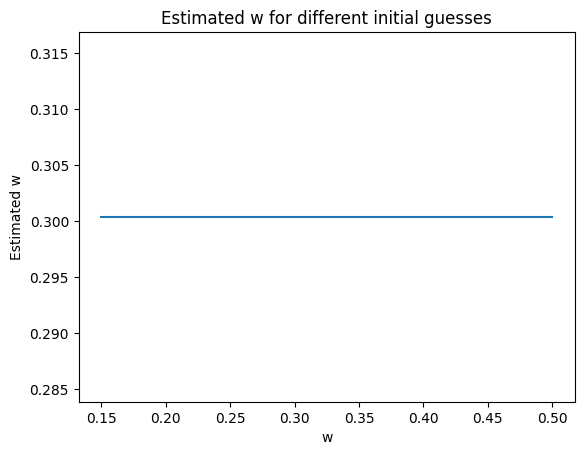

In [48]:
# Plot the results
plt.plot(w_values, ML_params_for_w)
plt.xlabel("w")
plt.ylabel("Estimated w")
plt.title("Estimated w for different initial guesses")
plt.show()